<a href="https://colab.research.google.com/github/LLhoest/Master-Thesis-LL/blob/main/MT_LL_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Master Thesis/Final Data/final_dataset.csv')
# Splitting data into two DataFrames based on item_name
train_A = train[train['item_name'] == 'A']
train_B = train[train['item_name'] == 'B']

# General visualization


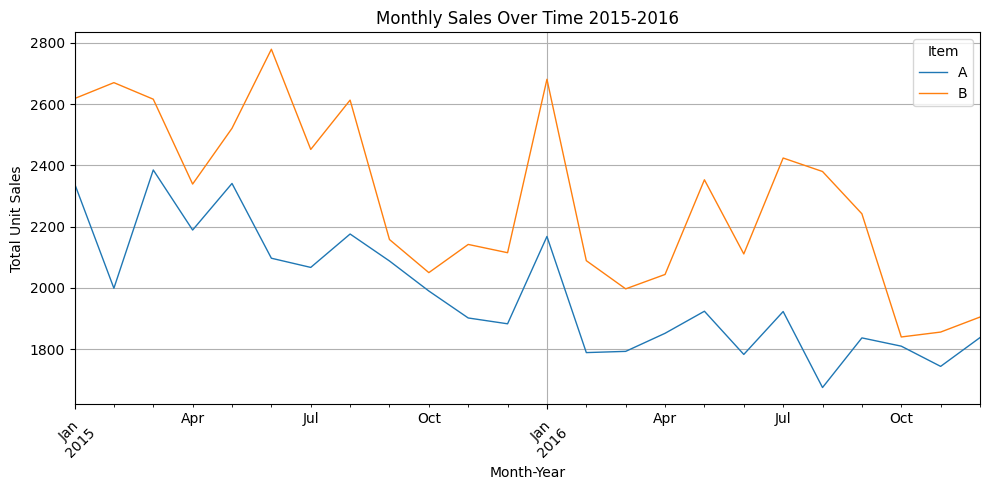

In [ ]:
# Convert 'date' column to datetime
train['date'] = pd.to_datetime(train['date'])

# Extract Month-Year
train['Month-Year'] = train['date'].dt.to_period('M')

# Grouping data by Month-Year and item_name, and calculating total unit sales
monthly_sales = train.groupby(['Month-Year', 'item_name'])['unit_sales'].sum().unstack()

# Plotting total unit sales over time for item A and item B
monthly_sales.plot(kind='line', linewidth=1, figsize=(10, 5))  # Adjusted figure size for a wider graph
plt.title('Monthly Sales Over Time 2015-2016')
plt.xlabel('Month-Year')
plt.ylabel('Total Unit Sales')
plt.legend(title='Item')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

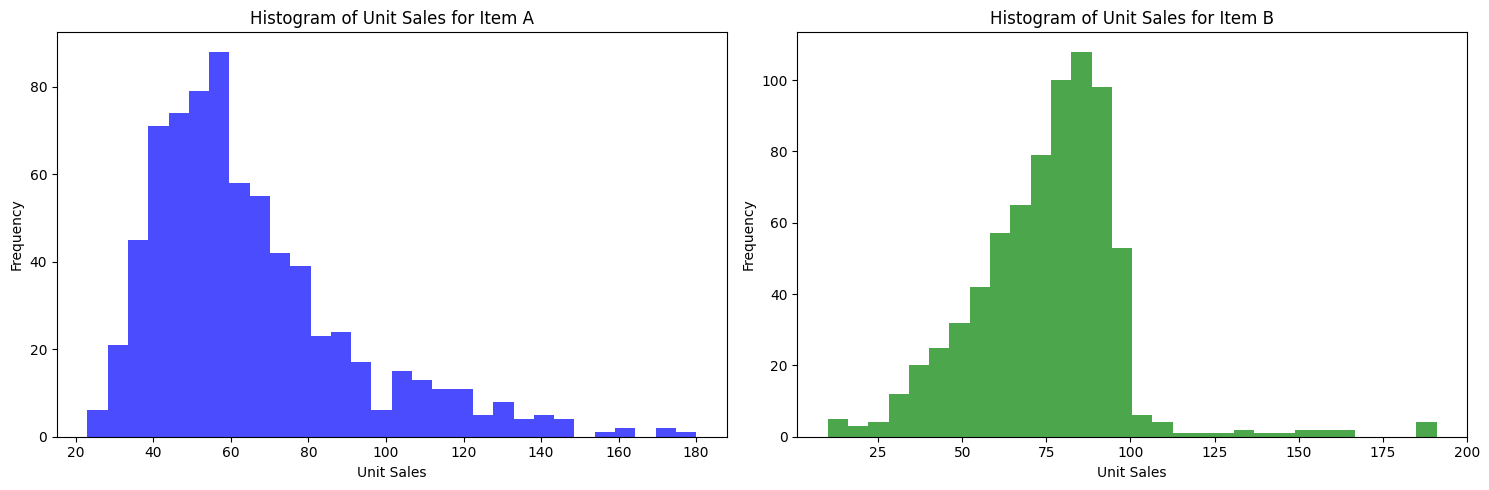

In [ ]:
# Plotting histograms for each item
plt.figure(figsize=(15, 5))

# Plot for item A
plt.subplot(1, 2, 1)
plt.hist(train_A['unit_sales'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Unit Sales for Item A')
plt.xlabel('Unit Sales')
plt.ylabel('Frequency')

# Plot for item B
plt.subplot(1, 2, 2)
plt.hist(train_B['unit_sales'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Unit Sales for Item B')
plt.xlabel('Unit Sales')
plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

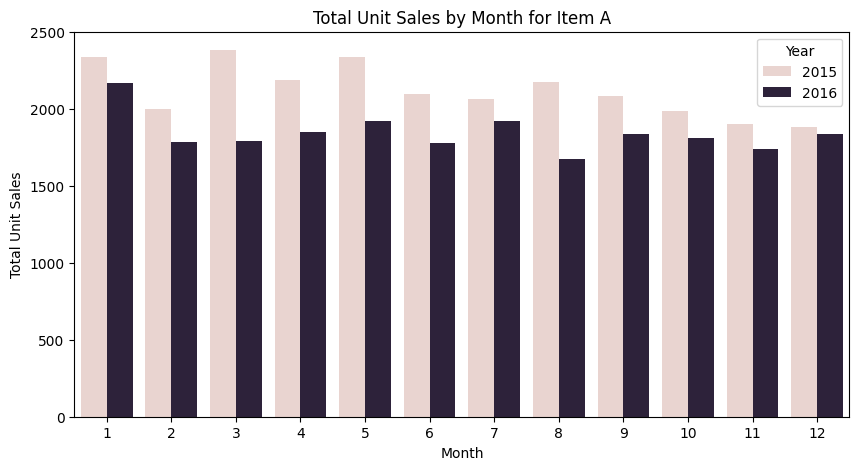

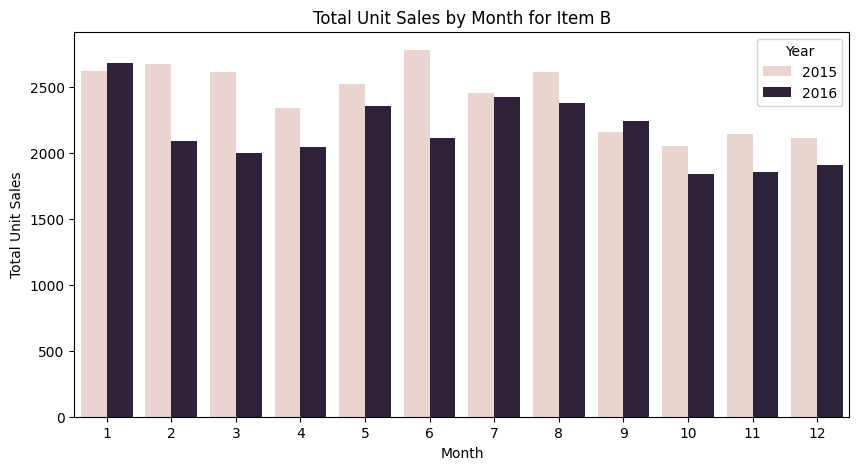

In [ ]:
# Compare sales performance across different months for item A
monthly_sales_A = train_A.groupby(['year', 'month'])['unit_sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='unit_sales', hue='year', data=monthly_sales_A)
plt.xlabel('Month')
plt.ylabel('Total Unit Sales')
plt.title('Total Unit Sales by Month for Item A')
plt.legend(title='Year')
plt.show()

# Compare sales performance across different months for item B
monthly_sales_B = train_B.groupby(['year', 'month'])['unit_sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='unit_sales', hue='year', data=monthly_sales_B)
plt.xlabel('Month')
plt.ylabel('Total Unit Sales')
plt.title('Total Unit Sales by Month for Item B')
plt.legend(title='Year')
plt.show()

# Day of the Week Visualization

<ipython-input-32-0f36aa51f5e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_A['date'] = pd.to_datetime(train_A['date'])
<ipython-input-32-0f36aa51f5e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_B['date'] = pd.to_datetime(train_B['date'])


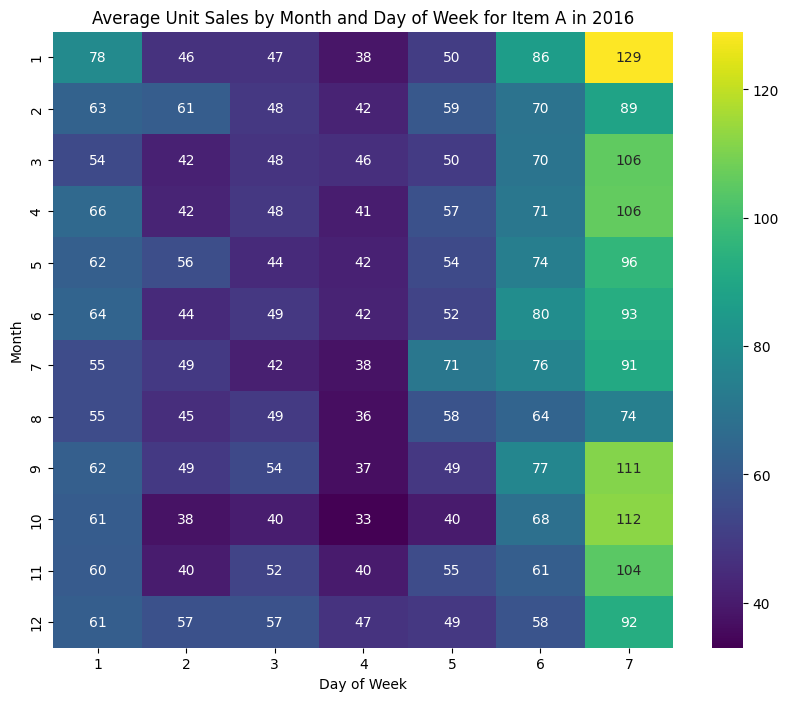

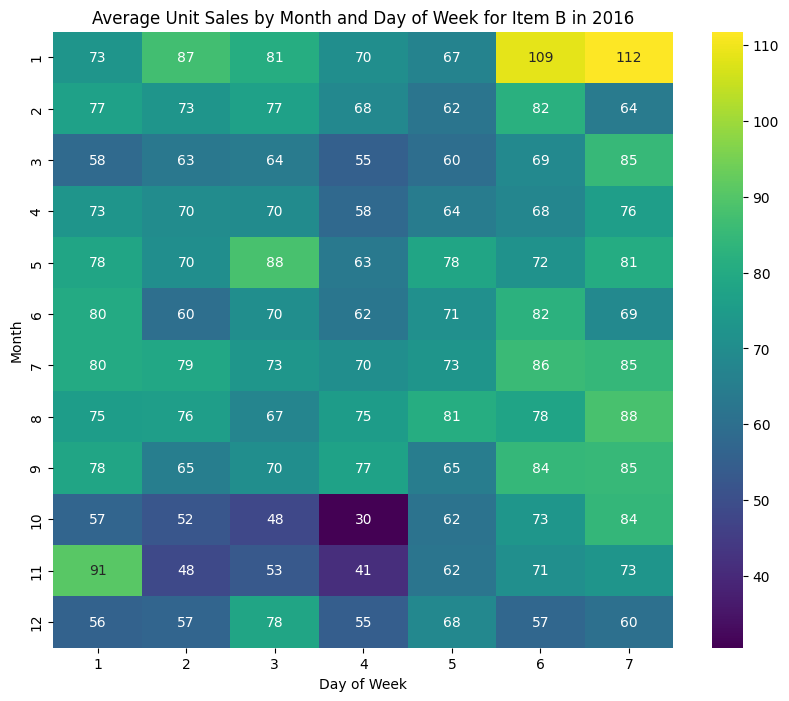

In [ ]:
# Convert the 'date' column to datetime format in all DataFrames if not already done
train['date'] = pd.to_datetime(train['date'])
train_A['date'] = pd.to_datetime(train_A['date'])
train_B['date'] = pd.to_datetime(train_B['date'])

# Filter data for the year 2016
train_2016 = train[train['date'].dt.year == 2016]
train_A_2016 = train_A[train_A['date'].dt.year == 2016]
train_B_2016 = train_B[train_B['date'].dt.year == 2016]

# Creating a pivot table for the year 2016
heatmap_data_2016 = train_2016.pivot_table(index='month', columns='day_of_week', values='unit_sales', aggfunc='mean')

# For item A
heatmap_data_A_2016 = train_A_2016.pivot_table(index='month', columns='day_of_week', values='unit_sales', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_A_2016, cmap='viridis', annot=True, fmt=".0f")
plt.title('Average Unit Sales by Month and Day of Week for Item A in 2016')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()

# For item B
heatmap_data_B_2016 = train_B_2016.pivot_table(index='month', columns='day_of_week', values='unit_sales', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_B_2016, cmap='viridis', annot=True, fmt=".0f")
plt.title('Average Unit Sales by Month and Day of Week for Item B in 2016')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()

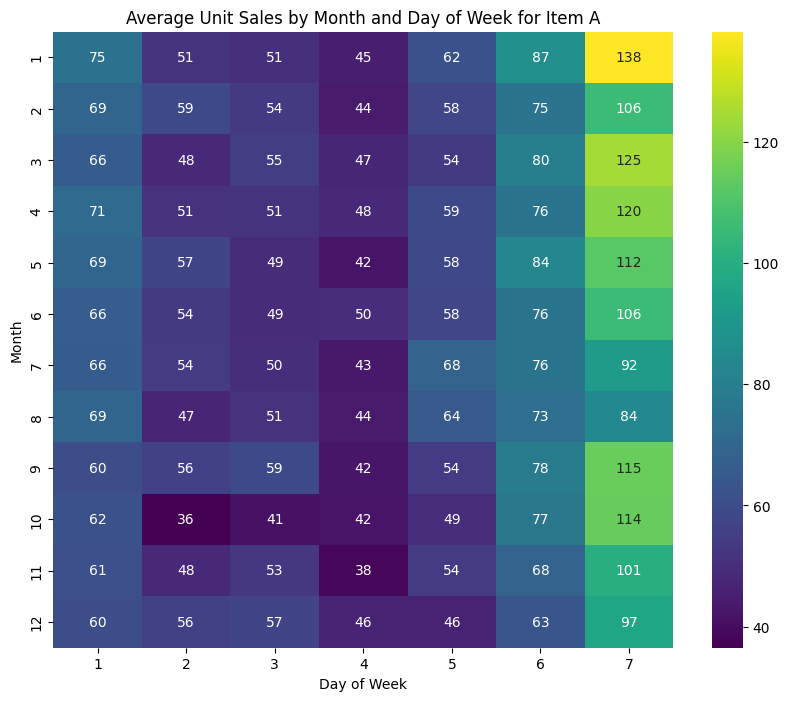

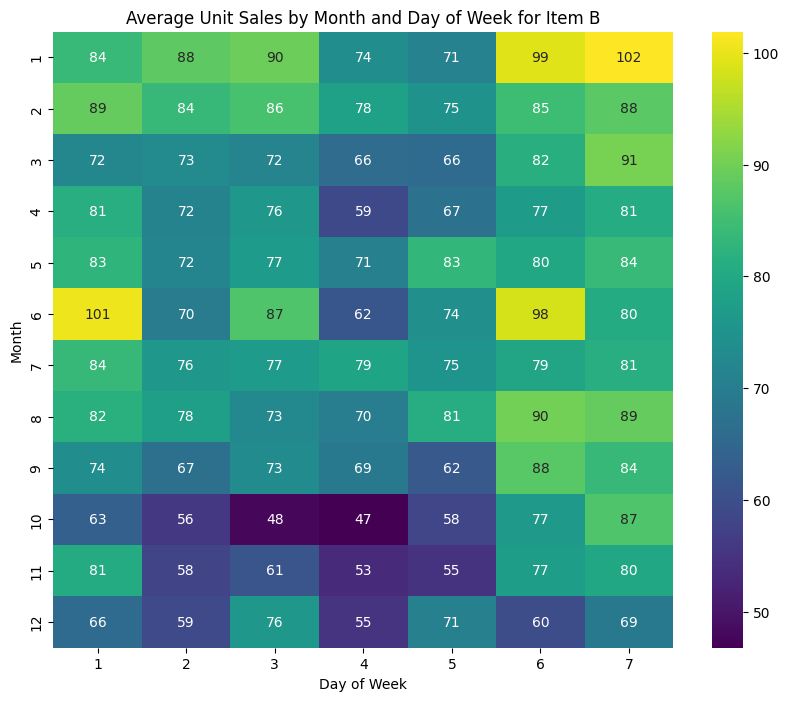

In [ ]:
# visualize the interaction between days of the week and months in terms of sales volume
# Creating a pivot table
heatmap_data = train.pivot_table(index='month', columns='day_of_week', values='unit_sales', aggfunc='mean')

# For item A
heatmap_data_A = train_A.pivot_table(index='month', columns='day_of_week', values='unit_sales', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_A, cmap='viridis', annot=True, fmt=".0f")
plt.title('Average Unit Sales by Month and Day of Week for Item A')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()

# For item B
heatmap_data_B = train_B.pivot_table(index='month', columns='day_of_week', values='unit_sales', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_B, cmap='viridis', annot=True, fmt=".0f")
plt.title('Average Unit Sales by Month and Day of Week for Item B')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()

<ipython-input-34-9bd62a2ee9a7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_A['day_name'] = train_A['day_of_week'].map(day_mapping)
<ipython-input-34-9bd62a2ee9a7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_B['day_name'] = train_B['day_of_week'].map(day_mapping)
<ipython-input-34-9bd62a2ee9a7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns

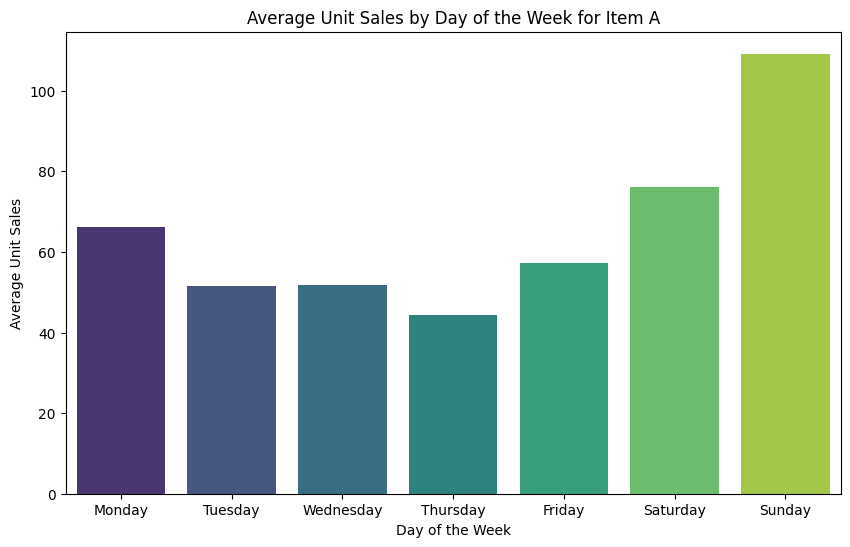

<ipython-input-34-9bd62a2ee9a7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_data_B.index, y=weekly_data_B, palette='viridis')


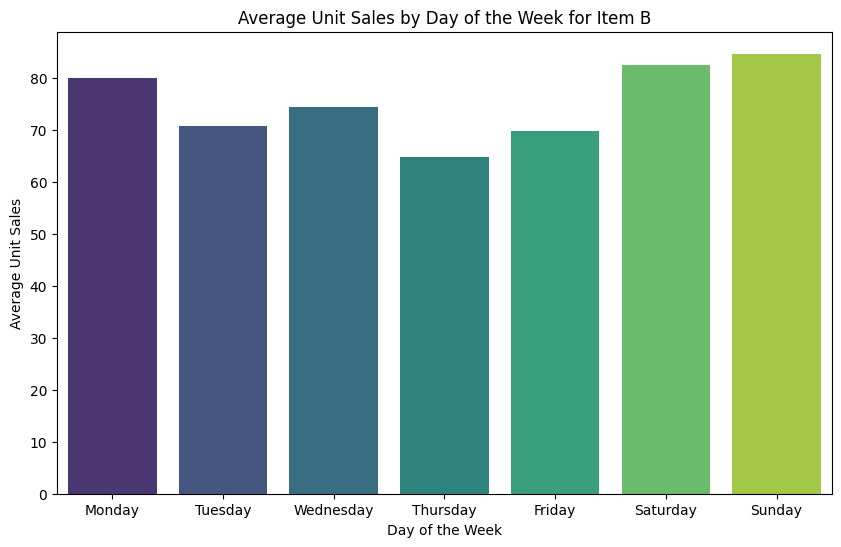

In [ ]:
# Mapping days of the week from numerical to names for better readability
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
train['day_name'] = train['day_of_week'].map(day_mapping)

# Grouping data by day of the week and calculating average unit sales
weekly_data = train.groupby('day_name')['unit_sales'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Mapping days of the week from numerical to names for better readability for item A
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
train_A['day_name'] = train_A['day_of_week'].map(day_mapping)

# Mapping days of the week from numerical to names for better readability for item B
train_B['day_name'] = train_B['day_of_week'].map(day_mapping)

# Grouping data by day of the week and calculating average unit sales for item A
weekly_data_A = train_A.groupby('day_name')['unit_sales'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Creating a bar plot for average unit sales per day of the week for item A
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_data_A.index, y=weekly_data_A, palette='viridis')
plt.title('Average Unit Sales by Day of the Week for Item A')
plt.xlabel('Day of the Week')
plt.ylabel('Average Unit Sales')
plt.show()

# Grouping data by day of the week and calculating average unit sales for item B
weekly_data_B = train_B.groupby('day_name')['unit_sales'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Creating a bar plot for average unit sales per day of the week for item B
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_data_B.index, y=weekly_data_B, palette='viridis')
plt.title('Average Unit Sales by Day of the Week for Item B')
plt.xlabel('Day of the Week')
plt.ylabel('Average Unit Sales')
plt.show()

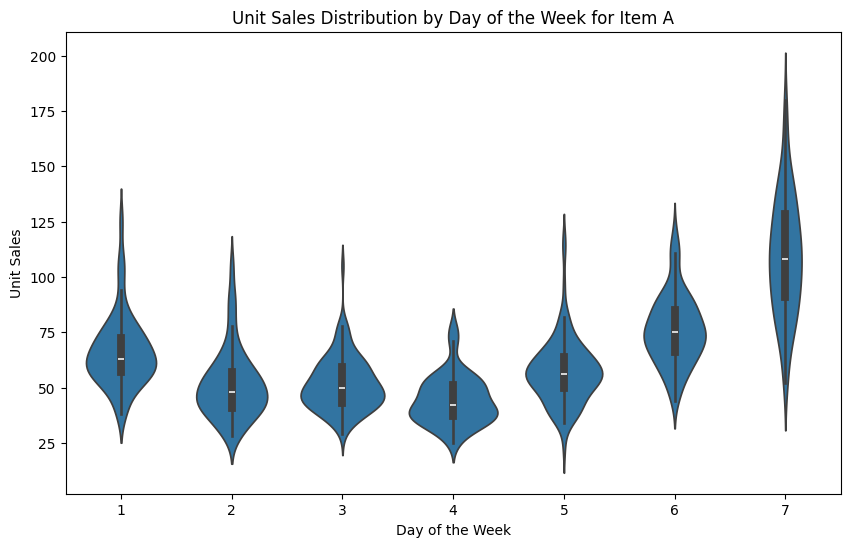

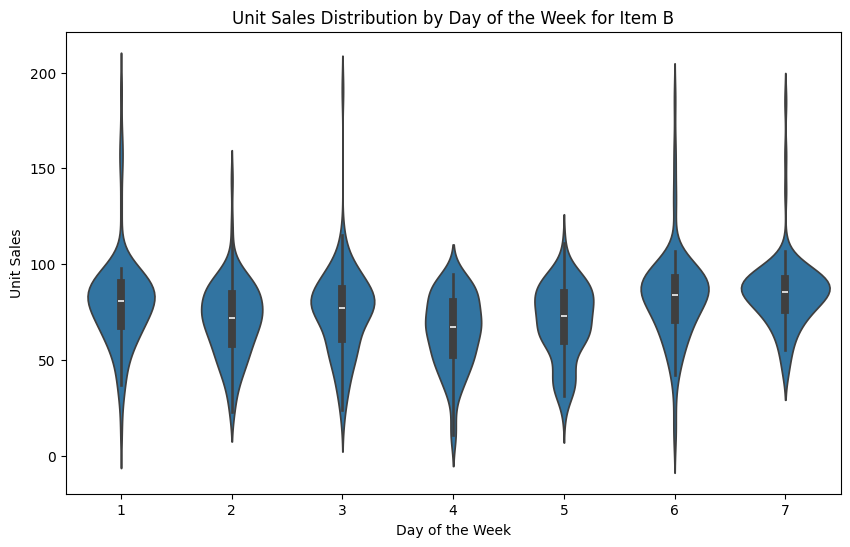

In [ ]:
# Probability density of the unit sales at different days for item A
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', y='unit_sales', data=train_A)
plt.title('Unit Sales Distribution by Day of the Week for Item A')
plt.xlabel('Day of the Week')
plt.ylabel('Unit Sales')
plt.show()

# Probability density of the unit sales at different days for item B
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', y='unit_sales', data=train_B)
plt.title('Unit Sales Distribution by Day of the Week for Item B')
plt.xlabel('Day of the Week')
plt.ylabel('Unit Sales')
plt.show()

# Visualization per Item

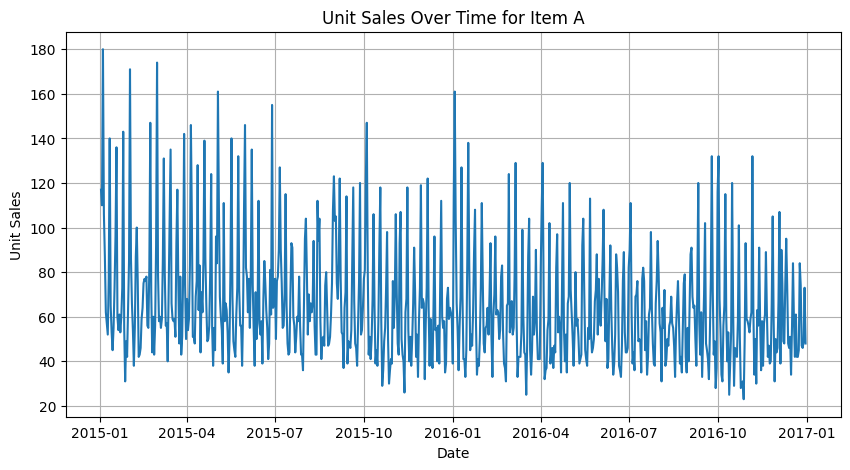

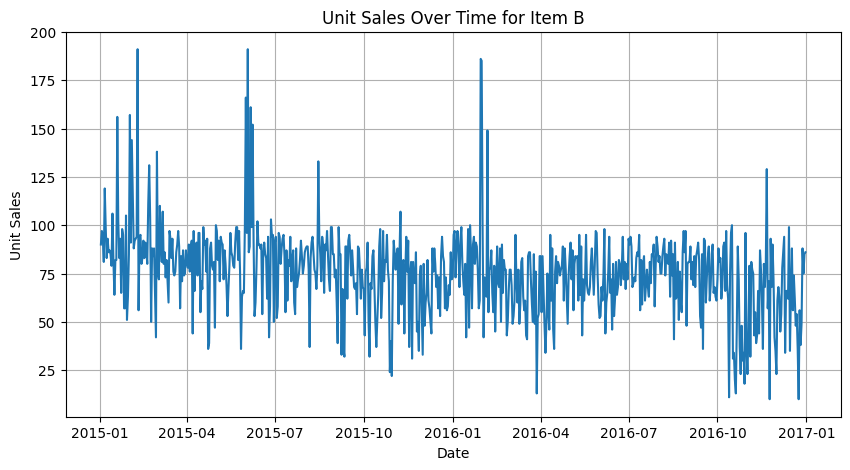

In [ ]:
# Get unique item names
unique_items = train['item_name'].unique()

# Plot unit sales for each item in a separate graph
for item in unique_items:
    # Filter data for the current item
    item_data = train[train['item_name'] == item]

    # Group by date and sum unit sales
    item_sales_over_time = item_data.groupby('date')['unit_sales'].sum()

    # Create a new figure for each item
    plt.figure(figsize=(10, 5))

    # Plotting
    plt.plot(item_sales_over_time)

    # Adding labels and title
    plt.title(f'Unit Sales Over Time for Item {item}')
    plt.xlabel('Date')
    plt.ylabel('Unit Sales')
    plt.grid(True)

    # Show the plot
    plt.show()

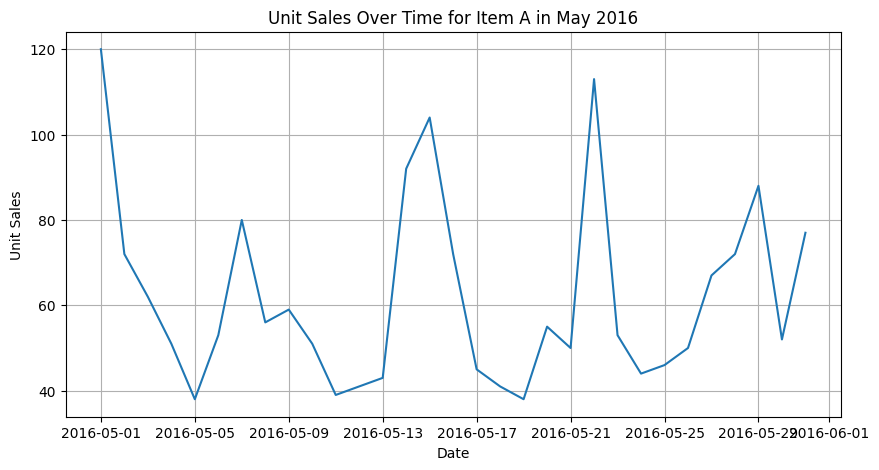

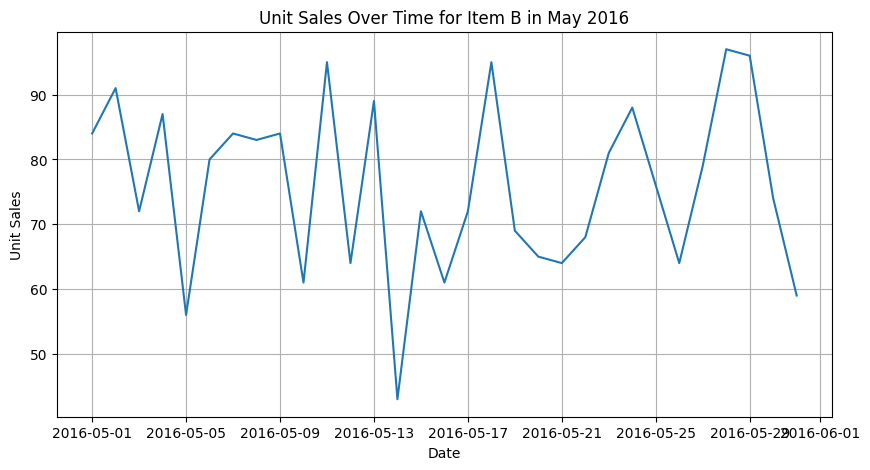

In [ ]:
# Filter data for May 2016
may_2016_data = train[(train['date'] >= '2016-05-01') & (train['date'] <= '2016-05-31')]

# Get unique item names
unique_items = may_2016_data['item_name'].unique()

# Plot unit sales for each item in a separate graph
for item in unique_items:
    # Filter data for the current item
    item_data = may_2016_data[may_2016_data['item_name'] == item]

    # Group by date and sum unit sales
    item_sales_over_time = item_data.groupby('date')['unit_sales'].sum()

    # Create a new figure for each item
    plt.figure(figsize=(10, 5))

    # Plotting
    plt.plot(item_sales_over_time)

    # Adding labels and title
    plt.title(f'Unit Sales Over Time for Item {item} in May 2016')
    plt.xlabel('Date')
    plt.ylabel('Unit Sales')
    plt.grid(True)

    # Show the plot
    plt.show()

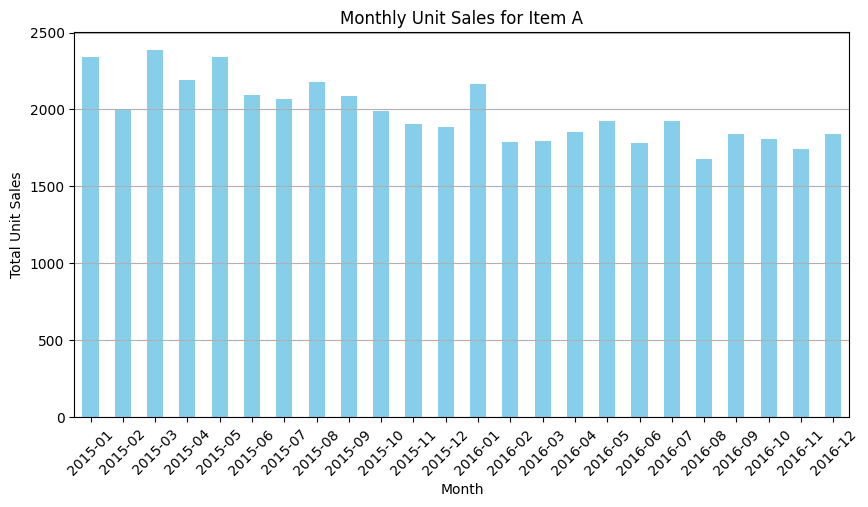

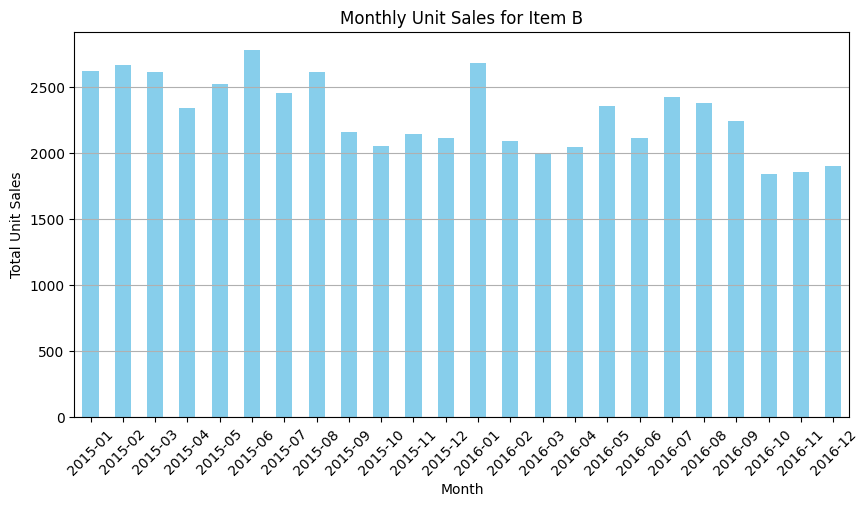

In [ ]:
# Extract year and month from the date for monthly grouping
train['YearMonth'] = train['date'].dt.to_period('M')

# Get unique item names
unique_items = train['item_name'].unique()

# Plot unit sales per month for each item
for item in unique_items:
    # Filter data for the current item
    item_data = train[train['item_name'] == item]

    # Group by month and sum unit sales
    season_sales = item_data.groupby('YearMonth')['unit_sales'].sum()

    # Create a new figure for each item
    plt.figure(figsize=(10, 5))

    # Plotting
    season_sales.plot(kind='bar', color='skyblue')

    # Adding labels and title
    plt.title(f'Monthly Unit Sales for Item {item}')
    plt.xlabel('Month')
    plt.ylabel('Total Unit Sales')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True, axis='y')

    # Show the plot
    plt.show()

# Features and Correlation

<Figure size 1200x600 with 0 Axes>

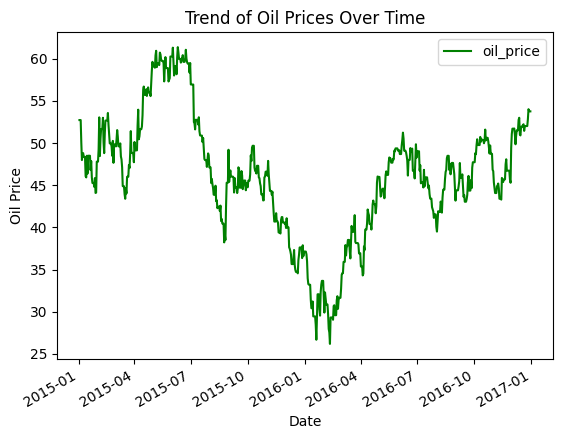

In [ ]:
# Filtering out rows with NaN values for oil_price
oil_prices = train.dropna(subset=['oil_price'])

# Converting 'date' to datetime if not already done
oil_prices['date'] = pd.to_datetime(oil_prices['date'])

plt.figure(figsize=(12, 6))
oil_prices.plot(x='date', y='oil_price', color='green')
plt.title('Trend of Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.show()

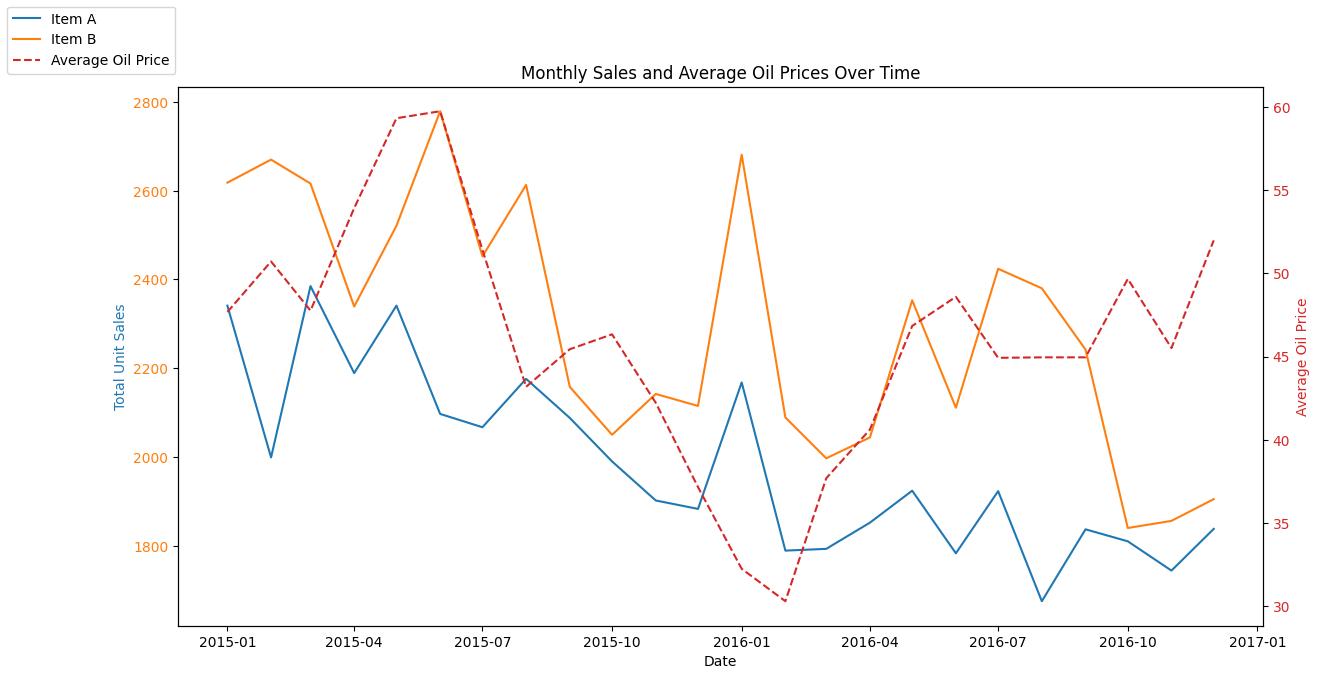

In [ ]:
# Grouping data for item A by month to sum unit sales and get average oil price
monthly_data_A = train_A.groupby(train_A['date'].dt.to_period('M')).agg({
    'unit_sales': 'sum',
    'oil_price': 'mean'
}).reset_index()

# Grouping data for item B by month to sum unit sales and get average oil price
monthly_data_B = train_B.groupby(train_B['date'].dt.to_period('M')).agg({
    'unit_sales': 'sum',
    'oil_price': 'mean'
}).reset_index()

# Converting period to datetime for plotting
monthly_data_A['date'] = monthly_data_A['date'].dt.to_timestamp()
monthly_data_B['date'] = monthly_data_B['date'].dt.to_timestamp()

# Creating a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the unit sales for item A on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Unit Sales', color=color)
ax1.plot(monthly_data_A['date'], monthly_data_A['unit_sales'], color=color, label='Item A')
ax1.tick_params(axis='y', labelcolor=color)

# Plotting the unit sales for item B on the primary y-axis
color = 'tab:orange'  # You can choose any color you prefer
ax1.plot(monthly_data_B['date'], monthly_data_B['unit_sales'], color=color, label='Item B')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for the oil price
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Average Oil Price', color=color)  # we already handled the x-label with ax1
ax2.plot(monthly_data_A['date'], monthly_data_A['oil_price'], color=color, linestyle='--', label='Average Oil Price')
ax2.tick_params(axis='y', labelcolor=color)

# Adding a legend
fig.legend(loc='upper left')

# Adding a title and showing the plot
plt.title('Monthly Sales and Average Oil Prices Over Time')
plt.show()

Correlation coefficient between monthly sales and oil prices (Item A): 0.35


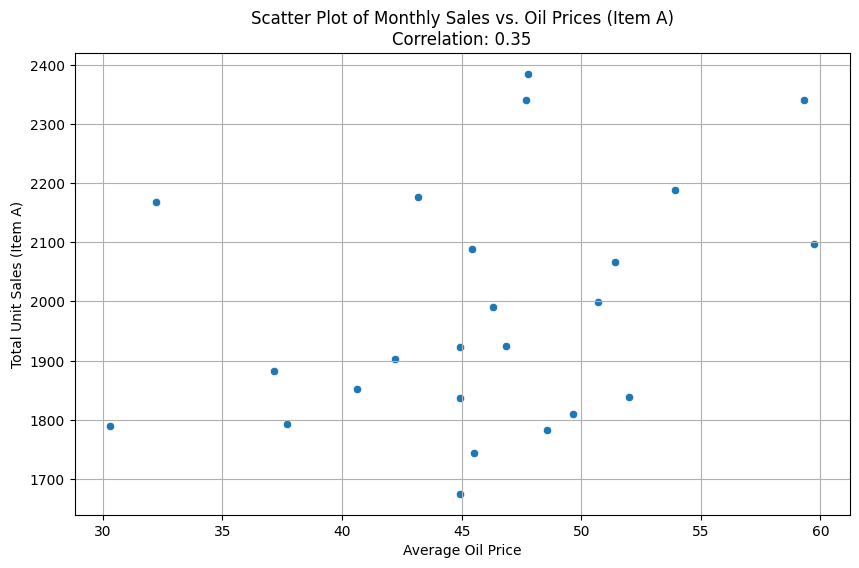

Correlation coefficient between monthly sales and oil prices (Item B): 0.26


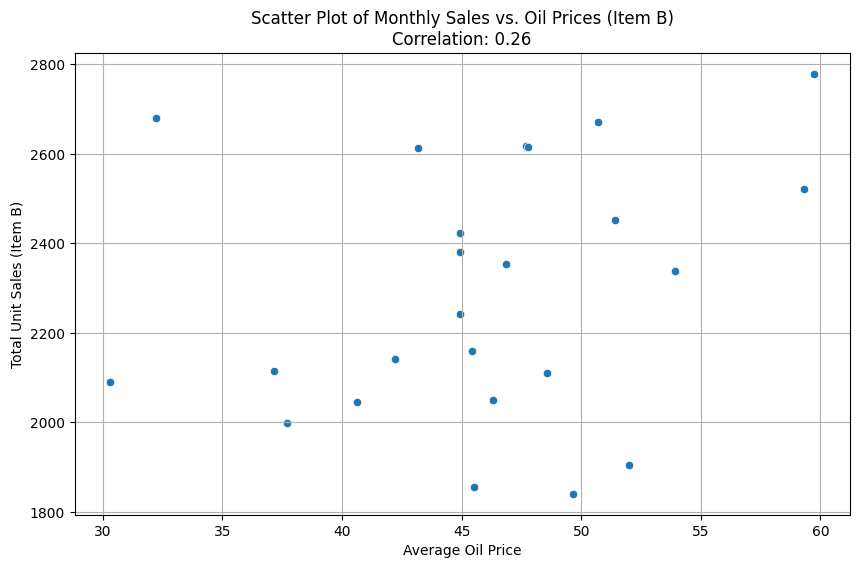

In [ ]:
# Grouping data for item A by month to sum unit sales and get average oil price
monthly_data_A = train_A.groupby(train_A['date'].dt.to_period('M')).agg({
    'unit_sales': 'sum',
    'oil_price': 'mean'
}).dropna()  # Drop any month where the oil price might be NaN

# Grouping data for item B by month to sum unit sales and get average oil price
monthly_data_B = train_B.groupby(train_B['date'].dt.to_period('M')).agg({
    'unit_sales': 'sum',
    'oil_price': 'mean'
}).dropna()  # Drop any month where the oil price might be NaN

# Calculating the correlation coefficient for item A
correlation_A = monthly_data_A['unit_sales'].corr(monthly_data_A['oil_price'])
print(f"Correlation coefficient between monthly sales and oil prices (Item A): {correlation_A:.2f}")

# Plotting scatter plot for item A
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oil_price', y='unit_sales', data=monthly_data_A)
plt.title(f'Scatter Plot of Monthly Sales vs. Oil Prices (Item A)\nCorrelation: {correlation_A:.2f}')
plt.xlabel('Average Oil Price')
plt.ylabel('Total Unit Sales (Item A)')
plt.grid(True)
plt.show()

# Calculating the correlation coefficient for item B
correlation_B = monthly_data_B['unit_sales'].corr(monthly_data_B['oil_price'])
print(f"Correlation coefficient between monthly sales and oil prices (Item B): {correlation_B:.2f}")

# Plotting scatter plot for item B
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oil_price', y='unit_sales', data=monthly_data_B)
plt.title(f'Scatter Plot of Monthly Sales vs. Oil Prices (Item B)\nCorrelation: {correlation_B:.2f}')
plt.xlabel('Average Oil Price')
plt.ylabel('Total Unit Sales (Item B)')
plt.grid(True)
plt.show()

Correlation coefficient between monthly sales and oil prices: 0.33


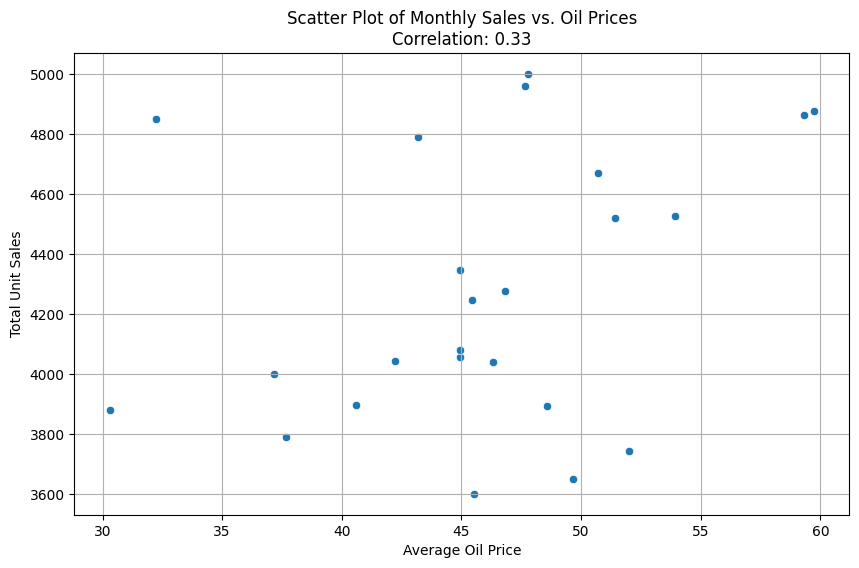

In [ ]:
# Grouping data by month to sum unit sales and get average oil price
monthly_data = train.groupby(train['date'].dt.to_period('M')).agg({
    'unit_sales': 'sum',
    'oil_price': 'mean'
}).dropna()  # Drop any month where the oil price might be NaN

# Calculating the correlation coefficient
correlation = monthly_data['unit_sales'].corr(monthly_data['oil_price'])
print(f"Correlation coefficient between monthly sales and oil prices: {correlation:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oil_price', y='unit_sales', data=monthly_data)
plt.title(f'Scatter Plot of Monthly Sales vs. Oil Prices\nCorrelation: {correlation:.2f}')
plt.xlabel('Average Oil Price')
plt.ylabel('Total Unit Sales')
plt.grid(True)
plt.show()

Correlation coefficient between monthly sales and average maximum temperature: -0.13


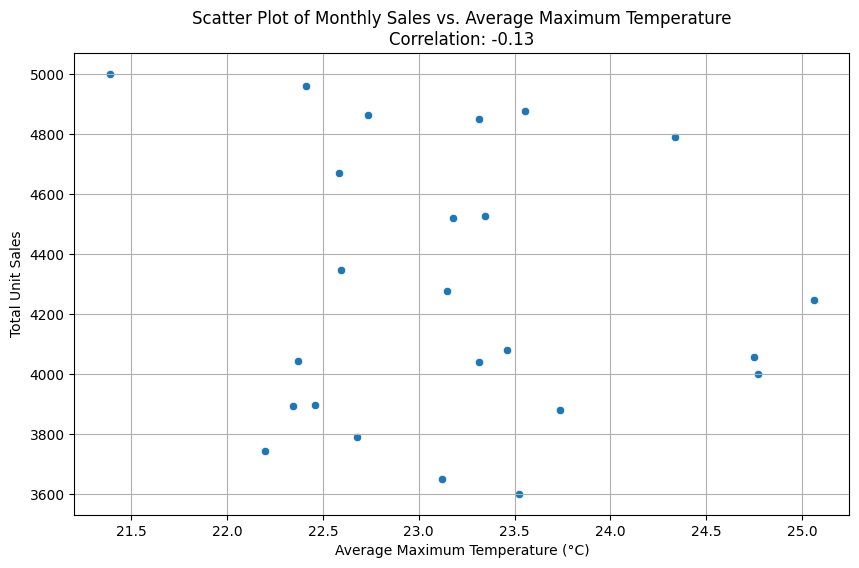

In [ ]:
# Grouping data by month to sum unit sales and get average maximum temperature
monthly_data = train.groupby(train['date'].dt.to_period('M')).agg({
    'unit_sales': 'sum',
    'tempmax': 'mean'
}).dropna()  # Drop any month where the maximum temperature might be NaN

# Calculating the correlation coefficient
correlation = monthly_data['unit_sales'].corr(monthly_data['tempmax'])
print(f"Correlation coefficient between monthly sales and average maximum temperature: {correlation:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempmax', y='unit_sales', data=monthly_data)
plt.title(f'Scatter Plot of Monthly Sales vs. Average Maximum Temperature\nCorrelation: {correlation:.2f}')
plt.xlabel('Average Maximum Temperature (°C)')
plt.ylabel('Total Unit Sales')
plt.grid(True)
plt.show()

Correlation coefficient between monthly sales and average maximum temperature (Item A): -0.22


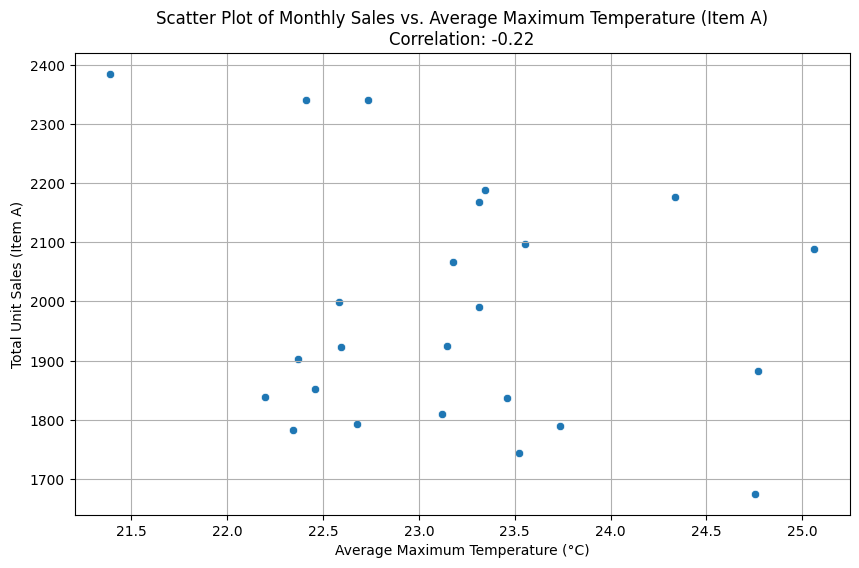

Correlation coefficient between monthly sales and average maximum temperature (Item B): -0.05


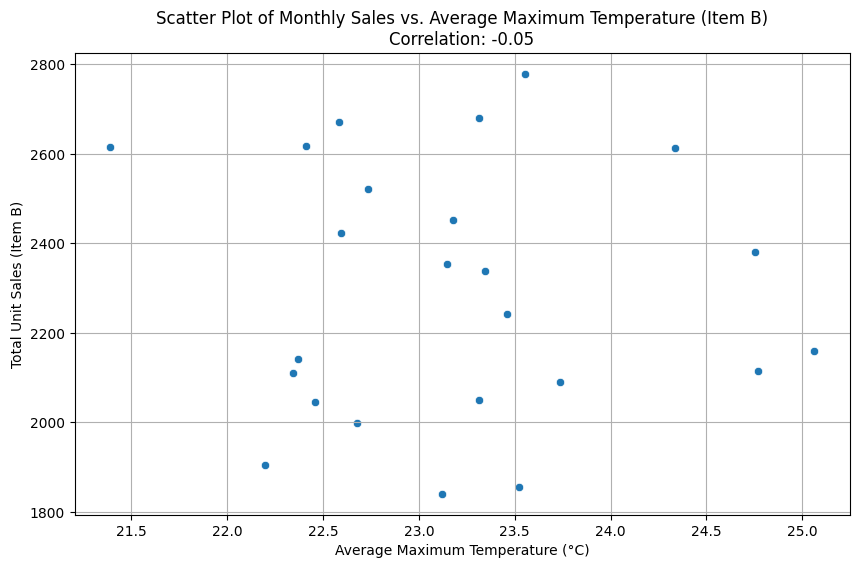

In [ ]:
# Grouping data for item A by month to sum unit sales and get average maximum temperature
monthly_data_A = train_A.groupby(train_A['date'].dt.to_period('M')).agg({
    'unit_sales': 'sum',
    'tempmax': 'mean'
}).dropna()  # Drop any month where the maximum temperature might be NaN

# Grouping data for item B by month to sum unit sales and get average maximum temperature
monthly_data_B = train_B.groupby(train_B['date'].dt.to_period('M')).agg({
    'unit_sales': 'sum',
    'tempmax': 'mean'
}).dropna()  # Drop any month where the maximum temperature might be NaN

# Calculating the correlation coefficient for item A
correlation_A = monthly_data_A['unit_sales'].corr(monthly_data_A['tempmax'])
print(f"Correlation coefficient between monthly sales and average maximum temperature (Item A): {correlation_A:.2f}")

# Plotting scatter plot for item A
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempmax', y='unit_sales', data=monthly_data_A)
plt.title(f'Scatter Plot of Monthly Sales vs. Average Maximum Temperature (Item A)\nCorrelation: {correlation_A:.2f}')
plt.xlabel('Average Maximum Temperature (°C)')
plt.ylabel('Total Unit Sales (Item A)')
plt.grid(True)
plt.show()

# Calculating the correlation coefficient for item B
correlation_B = monthly_data_B['unit_sales'].corr(monthly_data_B['tempmax'])
print(f"Correlation coefficient between monthly sales and average maximum temperature (Item B): {correlation_B:.2f}")

# Plotting scatter plot for item B
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempmax', y='unit_sales', data=monthly_data_B)
plt.title(f'Scatter Plot of Monthly Sales vs. Average Maximum Temperature (Item B)\nCorrelation: {correlation_B:.2f}')
plt.xlabel('Average Maximum Temperature (°C)')
plt.ylabel('Total Unit Sales (Item B)')
plt.grid(True)
plt.show()

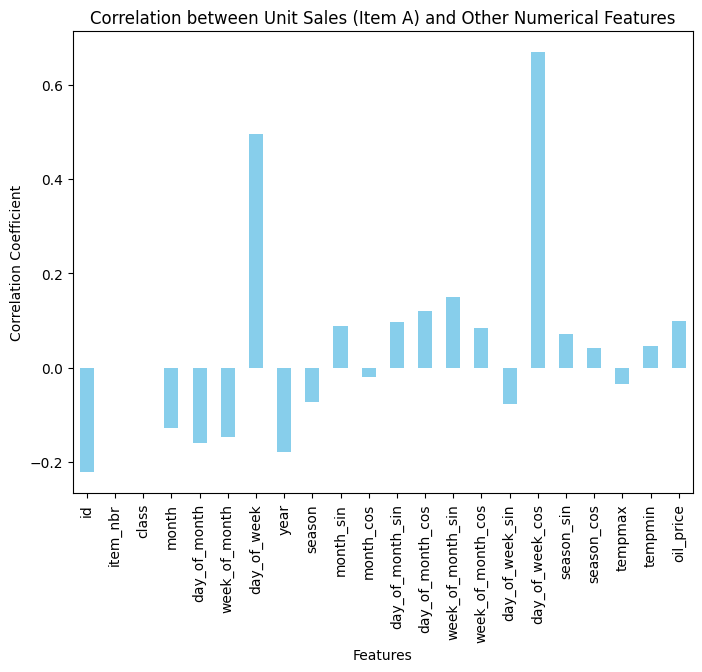

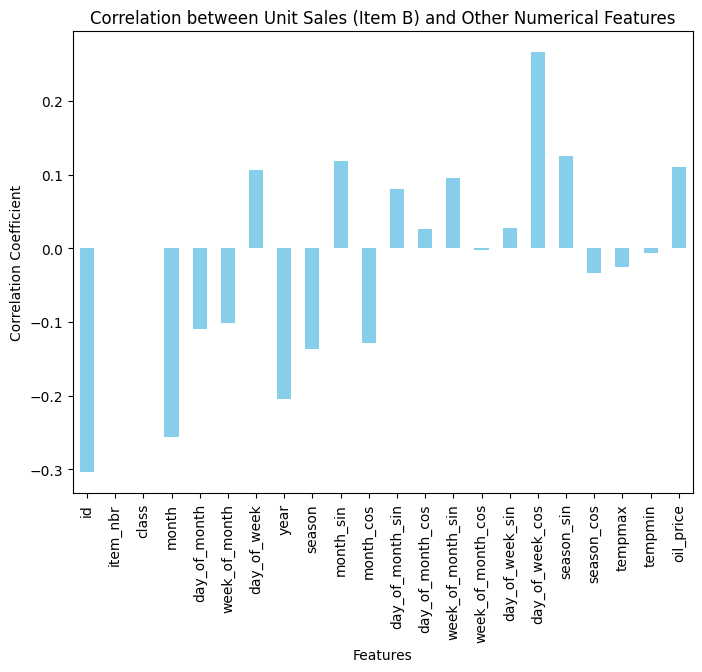

In [ ]:
# Select only numeric columns for correlation calculation for item A
numeric_data_A = train_A.select_dtypes(include=[np.number])

# Calculate the correlation matrix for item A
corr_matrix_A = numeric_data_A.corr()

# Select the 'unit_sales' row or column from the correlation matrix for item A
unit_sales_corr_A = corr_matrix_A['unit_sales']

# Create a DataFrame to better visualize the correlations for item A
corr_df_A = pd.DataFrame(unit_sales_corr_A)
corr_df_A.columns = ['Correlation with Unit Sales (Item A)']

# Plotting the correlation as a bar chart for item A
plt.figure(figsize=(8, 6))
unit_sales_corr_A.drop('unit_sales').plot(kind='bar', color='skyblue')  # Drop the self-correlation of 'unit_sales'
plt.title('Correlation between Unit Sales (Item A) and Other Numerical Features')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

# Select only numeric columns for correlation calculation for item B
numeric_data_B = train_B.select_dtypes(include=[np.number])

# Calculate the correlation matrix for item B
corr_matrix_B = numeric_data_B.corr()

# Select the 'unit_sales' row or column from the correlation matrix for item B
unit_sales_corr_B = corr_matrix_B['unit_sales']

# Create a DataFrame to better visualize the correlations for item B
corr_df_B = pd.DataFrame(unit_sales_corr_B)
corr_df_B.columns = ['Correlation with Unit Sales (Item B)']

# Plotting the correlation as a bar chart for item B
plt.figure(figsize=(8, 6))
unit_sales_corr_B.drop('unit_sales').plot(kind='bar', color='skyblue')  # Drop the self-correlation of 'unit_sales'
plt.title('Correlation between Unit Sales (Item B) and Other Numerical Features')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

<ipython-input-46-f07c8e0df6a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_A['onpromotion'] = train_A['onpromotion'].astype('category')


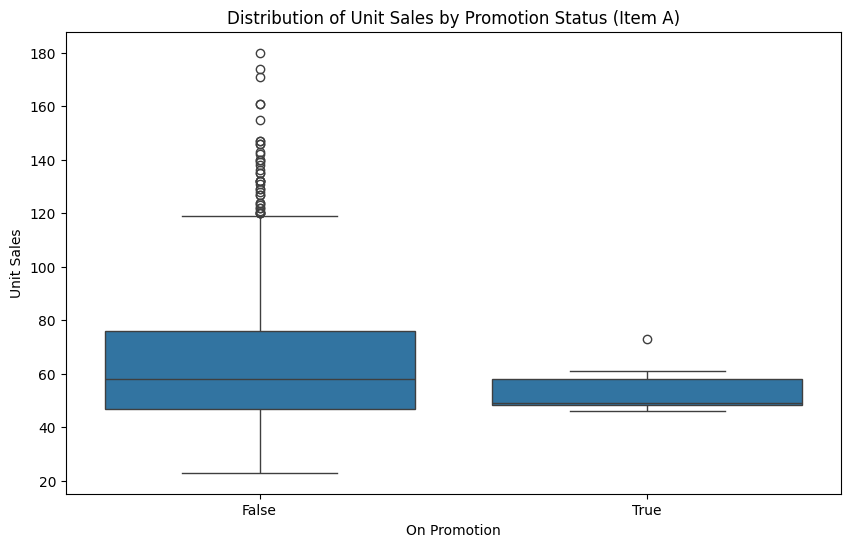

<ipython-input-46-f07c8e0df6a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_B['onpromotion'] = train_B['onpromotion'].astype('category')


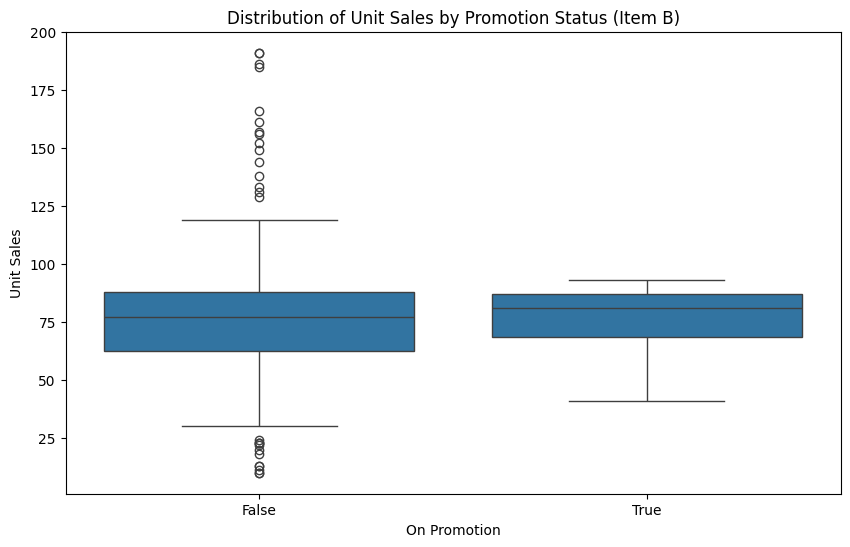

In [ ]:
# Converting 'onpromotion' to a categorical type for better plotting for item A
train_A['onpromotion'] = train_A['onpromotion'].astype('category')

# Creating a box plot for item A
plt.figure(figsize=(10, 6))
sns.boxplot(x='onpromotion', y='unit_sales', data=train_A)
plt.title('Distribution of Unit Sales by Promotion Status (Item A)')
plt.xlabel('On Promotion')
plt.ylabel('Unit Sales')
plt.show()

# Converting 'onpromotion' to a categorical type for better plotting for item B
train_B['onpromotion'] = train_B['onpromotion'].astype('category')

# Creating a box plot for item B
plt.figure(figsize=(10, 6))
sns.boxplot(x='onpromotion', y='unit_sales', data=train_B)
plt.title('Distribution of Unit Sales by Promotion Status (Item B)')
plt.xlabel('On Promotion')
plt.ylabel('Unit Sales')
plt.show()

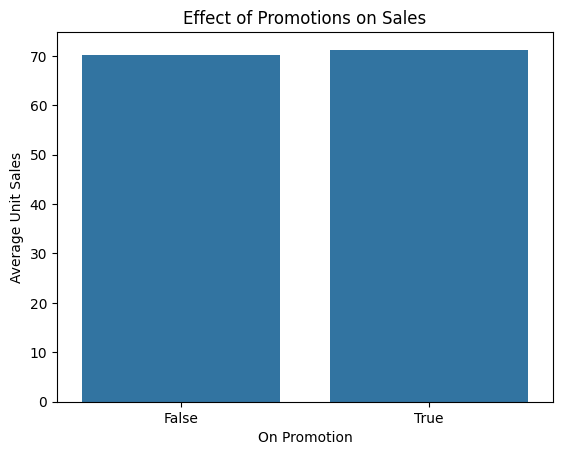

In [ ]:
promo_sales = train.groupby('onpromotion')['unit_sales'].mean()

sns.barplot(x=promo_sales.index, y=promo_sales.values)
plt.title('Effect of Promotions on Sales')
plt.xlabel('On Promotion')
plt.ylabel('Average Unit Sales')
plt.show()